Predict Health Insurance Owners' who will be interested in Vehicle Insurance

In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
import seaborn as sns

In [9]:
#Importing the dataset

data = pd.read_csv('/content/train.csv')


In [8]:
new_data = data.iloc[:5000,:]

In [10]:
new_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Male,36.0,1.0,8.0,0.0,> 2 Years,Yes,40278.0,124.0,62.0,0.0
4996,4997,Male,44.0,1.0,10.0,0.0,1-2 Year,Yes,27438.0,124.0,208.0,1.0
4997,4998,Male,58.0,1.0,28.0,0.0,1-2 Year,Yes,50889.0,26.0,105.0,0.0
4998,4999,Male,31.0,1.0,28.0,1.0,1-2 Year,No,36457.0,124.0,75.0,0.0


Data Preprocessing

In [12]:
#Handling missing values

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5000 non-null   int64  
 1   Gender                5000 non-null   object 
 2   Age                   5000 non-null   float64
 3   Driving_License       5000 non-null   float64
 4   Region_Code           5000 non-null   float64
 5   Previously_Insured    5000 non-null   float64
 6   Vehicle_Age           5000 non-null   object 
 7   Vehicle_Damage        5000 non-null   object 
 8   Annual_Premium        5000 non-null   float64
 9   Policy_Sales_Channel  5000 non-null   float64
 10  Vintage               5000 non-null   float64
 11  Response              5000 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 468.9+ KB


In [13]:
#Checking for null values

new_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
#splitting the data into X and Y

X = new_data.iloc[:,:-1].values
Y = new_data.iloc[:,-1].values

Handling Categorical values


In [15]:
#converting male, female to 0 and 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:,1])

In [17]:
new_data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [18]:
X[:, 6] = le.fit_transform(X[:, 6])

In [19]:
X[:, 7] = le.fit_transform(X[:, 7])

In [20]:
X

array([[1, 1, 44.0, ..., 40454.0, 26.0, 217.0],
       [2, 1, 76.0, ..., 33536.0, 26.0, 183.0],
       [3, 1, 47.0, ..., 38294.0, 26.0, 27.0],
       ...,
       [4998, 1, 58.0, ..., 50889.0, 26.0, 105.0],
       [4999, 1, 31.0, ..., 36457.0, 124.0, 75.0],
       [5000, 1, 63.0, ..., 30791.0, 26.0, 40.0]], dtype=object)

In [21]:
Y

array([1., 0., 1., ..., 0., 0., 0.])

Exploratory Data Analysis

In [23]:
new_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.68200,0.997800,26.201000,0.441600,30929.683400,112.909600,156.145600,0.123800
std,1443.520003,15.47505,0.046857,13.173918,0.496627,16732.411341,53.607076,83.681385,0.329386
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1250.750000,24.00000,1.000000,15.000000,0.000000,24814.000000,40.750000,85.000000,0.000000
50%,2500.500000,36.00000,1.000000,28.000000,0.000000,31967.000000,136.000000,156.000000,0.000000
75%,3750.250000,49.00000,1.000000,35.000000,1.000000,39816.000000,152.000000,229.000000,0.000000
max,5000.000000,84.00000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


<ipython-input-24-3a45cf132f36>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot = True)


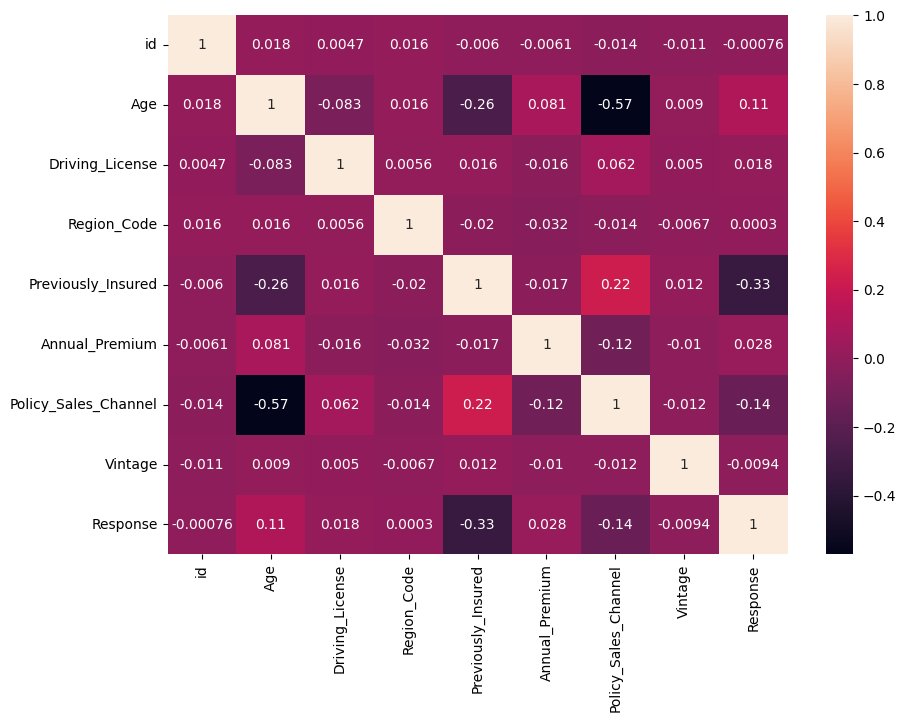

In [24]:
#Visual analysis

import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(new_data.corr(), annot = True)
plt.show()

splitting the data into train and test

In [25]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

Scaling the data

In [26]:
#using standard scaler to scale the data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
std_xtrain = ss.transform(x_train)
std_xtest = ss.transform(x_test)

Model Training

In [30]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(x_train, y_train)
dtpreds = dt.predict(x_test)

from sklearn.metrics import accuracy_score
dtacc = accuracy_score(y_test, dtpreds)
dtacc

0.811

In [46]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfpreds = rf.predict(x_test)

from sklearn.metrics import accuracy_score
rfacc = accuracy_score(y_test, rfpreds)
rfacc

0.873

In [47]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(std_xtrain, y_train)
lrpreds = lr.predict(std_xtest)

from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test, lrpreds)
lracc

0.881

In [48]:
#KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(std_xtrain, y_train)
knnpreds = knn.predict(std_xtest)

knnacc = accuracy_score(y_test, knnpreds)
knnacc

0.854

In [33]:
#Xgboost classifier

import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state = 1)
xgbc.fit(x_train, y_train)
xgbpreds = xgbc.predict(x_test)

from sklearn.metrics import accuracy_score
xgbacc = accuracy_score(y_test, xgbpreds)
xgbacc

0.859

In [34]:
#Artificial Neural Network

import tensorflow as tf

ann = tf.keras.models.Sequential()


In [35]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

In [36]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

In [37]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
X1 = np.asarray(x_train).astype(np.float32)
Y1 = np.asarray(y_train).astype(np.float32)

In [41]:
ann.fit(X1, Y1, batch_size = 100, epochs = 100)

Epoch 1/100
40/40 [==============================] - 4s 4ms/step - loss: 158.6541 - accuracy: 0.7785
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 55.7548 - accuracy: 0.7742
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 43.6490 - accuracy: 0.7997
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 26.5380 - accuracy: 0.7828
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 18.9561 - accuracy: 0.7645
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 20.9168 - accuracy: 0.7795
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 18.3951 - accuracy: 0.7940
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 15.3347 - accuracy: 0.7795
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 16.1488 - accuracy: 0.7895
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 19.5364 - accuracy: 0.782

In [55]:
import warnings
warnings.filterwarnings('ignore')

Tuning the Logistic Regression Model

In [56]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'LR__penalty':['l1','l2', 'elasticnet', 'none'],
                'LR__C':np.linspace(1,10,10),
                'LR__l1_ratio':np.linspace(0.001,0.9999,5)}

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mysteps = [('ss', StandardScaler()), ('LR', LogisticRegression(random_state = 1, solver = 'saga', max_iter = 1000, tol = 0.001))]

m_pipe = Pipeline(steps = mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('LR',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=1,
                                                                 solver='saga',
                                                                 tol=0.001))]),
                   param_distributions={'LR__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'LR__l1_ratio': array([0.001   , 0.250725, 0.50045 , 0.750175, 0.9999  ]),
                                        'LR__penalty': ['l1', 'l2',
                                                        'elasticnet', 'none']},
                   scoring='accuracy')

In [57]:
rcv.best_params_

{'LR__penalty': 'elasticnet', 'LR__l1_ratio': 0.750175, 'LR__C': 9.0}

In [61]:
Lrcacc = rcv.best_score_
Lrcacc

0.8762000000000001

Comparing models

In [62]:
acc_scores = [['KNN Classifier', knnacc], ['LogisticRegression', lracc],
              ['Xgboost classifier', xgbacc], ['DecisionTree', dtacc],
              ['RandomForest', rfacc], ['LogisticRegressionTuning', Lrcacc]]

dataframe = pd.DataFrame(acc_scores, columns = ['models', 'accuracy_scores'] )
dataframe

,models,accuracy_scores
0,KNN Classifier,0.8540
1,LogisticRegression,0.8810
2,Xgboost classifier,0.8590
3,DecisionTree,0.8110
4,RandomForest,0.8730
5,LogisticRegressionTuning,0.8762


Logistic Regression model predicts better than other models

Save the best model

In [63]:
pickle.dump(lr, open('insurancelr.pkl', 'wb'))